In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from vixstructure.utils import parse_whole_directory

In [2]:
def plot3d_loss(dataframe, zlim=None):
    X = dataframe.index.levels[0]
    Y = dataframe.index.levels[1]
    X, Y = np.meshgrid(X, Y)
    Z = np.reshape(
            np.array(list(map(lambda x: dataframe.get((x[0], x[1]), default=0.5),
                              np.reshape(np.dstack((X,Y)), (X.shape[0]*X.shape[1],2))))),
            X.shape)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, linewidth=None, antialiased=True, cmap=cm.coolwarm_r)
    ax.view_init(azim=225)
    ax.set_xlabel("Depth")
    ax.set_ylabel("Width")
    ax.set_xlim(X[0,0], X[-1,-1])
    ax.set_ylim(Y[0,0], Y[-1,-1])
    ax.set_zlim(zlim)
    ax.set_zlabel("Loss", rotation=90)

In [3]:
experiment1 = parse_whole_directory("models/experiment01/")
experiment2 = parse_whole_directory("models/experiment02/")
experiment3 = parse_whole_directory("models/experiment03/")
experiment4 = parse_whole_directory("models/experiment04/")

# Experiment 1

Basic estimation of width and depth.

In [4]:
ex1_min = experiment1["val_loss"].groupby(("depth", "width", "normalized", "datetime")).min()
ex1_min_basic = ex1_min[:,:,False]
ex1_min_normal = ex1_min[:,:,True]

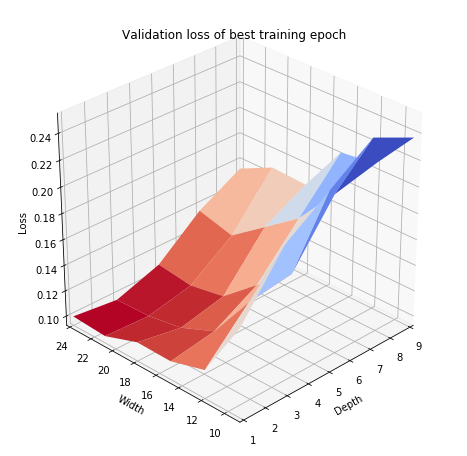

In [5]:
plot3d_loss(ex1_min_basic.groupby(("depth", "width")).mean())
plt.title("Validation loss of best training epoch")
plt.show()

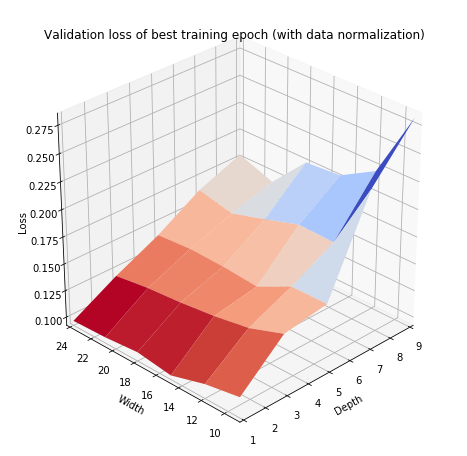

In [6]:
plot3d_loss(ex1_min_normal.groupby(("depth", "width")).mean())
plt.title("Validation loss of best training epoch (with data normalization)")
plt.show()

# Experiment 2

Using days to expiration as an explicit prior.

In [7]:
ex2_min = experiment2["val_loss"][1,:,False].groupby(("width", "datetime")).min()

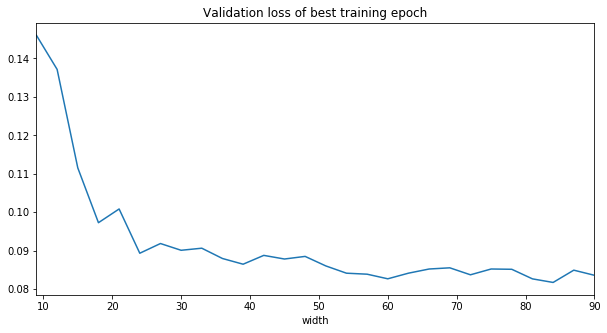

In [8]:
ex2_min.groupby("width").mean().plot(figsize=(10,5))
plt.title("Validation loss of best training epoch")
plt.show()

# Experiment 3

Trying out regularization with SeLU activation function.

In [9]:
ex3_min = experiment3["val_loss"][:,:,False].groupby(("depth", "width", "datetime")).min()

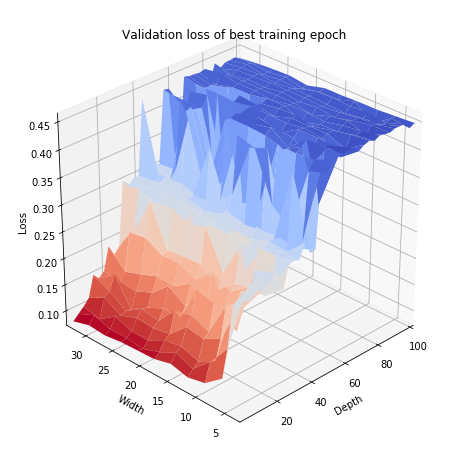

In [10]:
plot3d_loss(ex3_min.groupby(("depth", "width")).mean())
plt.title("Validation loss of best training epoch")
plt.show()

# Experiment 4

Using more input in hope of better performance.

In [11]:
ex4_min = experiment4["val_loss"][1].groupby(("width", "normalized", "datetime")).min()
ex4_min_basic = ex4_min[:,False]
ex4_min_normal = ex4_min[:,True]

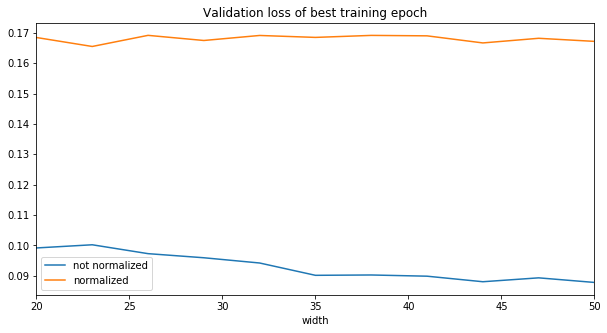

In [12]:
ex4_min_basic.groupby("width").mean().plot(figsize=(10,5), label="not normalized")
ex4_min_normal.groupby("width").mean().plot(label="normalized")
plt.legend()
plt.title("Validation loss of best training epoch")
plt.show()

# General comparison

Looking at the validation loss of the best epoch.

In [13]:
print("Experiment 1 (without normalization): {:>15.4} {:>5}".format(ex1_min_basic.groupby("width").mean().min(),
                                                                    ex1_min_basic.groupby("width").mean().argmin()))
print("Experiment 1 (with normalization): {:>18.4} {:>5}".format(ex1_min_normal.groupby("width").mean().min(),
                                                                 ex1_min_normal.groupby("width").mean().argmin()))
print("Experiment 2: {:>40.4} {:>4}".format(ex2_min.groupby("width").mean().min(),
                                         ex2_min.groupby("width").mean().argmin()))
print("Experiment 3: {:>40.4} {:>4}".format(ex3_min.groupby(("depth", "width")).mean().min(),
                                      ex3_min.groupby(("depth", "width")).mean().argmin()[1]))
print("Experiment 4 (without normalization): {:>16.4} {:>4}".format(ex4_min_basic.groupby("width").mean().min(),
                                                                    ex4_min_basic.groupby("width").mean().argmin()))
print("Experiment 4 (with normalization): {:>18.4} {:>5}".format(ex4_min_normal.groupby("width").mean().min(),
                                                           ex4_min_normal.groupby("width").mean().argmin()))

Experiment 1 (without normalization):          0.1184    24
Experiment 1 (with normalization):             0.1368    21
Experiment 2:                                  0.08176   84
Experiment 3:                                  0.07975   33
Experiment 4 (without normalization):          0.08782   50
Experiment 4 (with normalization):             0.1655    23


In [14]:
ex3_min.groupby(("depth", "width")).mean().argmin()

(1, 33)